<a href="https://colab.research.google.com/github/muriloborges16/Interface-Classificacao-IIC/blob/master/Murilo_Borges_SAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/Sistemas de apoio à decisão 2 2022/TMDB 10000 Movies Dataset.csv")

In [ ]:
df

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...,...
9995,11375,en,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,fr,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,en,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,en,Emergo,A team of parapsychologists sets out to invest...,6.226,2011-10-11,Apartment 143,5.3,242


In [ ]:
df.shape

(10000, 9)

In [ ]:
df.columns

Index(['id', 'original_language', 'original_title', 'overview', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

###Fazendo a filtragem das colunas para uma cópia do DF e removendo a coluna ID pois estava confusa com numeros aleatórios.

In [ ]:
dfcopia = df.filter(items=['original_language', 'original_title',	'overview',	'popularity',	'release_date',	'title',	'vote_average',	'vote_count'])

###Renomeando as colunas para o Português para ficar mais fácil para entender do que se trata cada coluna.

In [ ]:
dfcopia.rename(columns = { 'original_language': 'Idioma_Original', 
                          'original_title' : 'Título_Original',
                          'popularity' : 'Qtd_Visualizações',	
                          'release_date' : 'Data_Lançamento',
                          'title': 'Nome_Filme',
                          'overview': 'Sinopse',
                          'vote_average':'Nota do Público',
                          'vote_count': 'Qtd de votos'},
  inplace = True)

###Visualizando as informações do Dataframe para identificar quais colunas possuem valores nulos.

In [ ]:
dfcopia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idioma_Original    10000 non-null  object 
 1   Título_Original    10000 non-null  object 
 2   Sinopse            9994 non-null   object 
 3   Qtd_Visualizações  10000 non-null  float64
 4   Data_Lançamento    10000 non-null  object 
 5   Nome_Filme         10000 non-null  object 
 6   Nota do Público    10000 non-null  float64
 7   Qtd de votos       10000 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


###Visualizando a coluna "Sinopse" que possui valores Nulos.

In [ ]:
dfcopia.loc[dfcopia['Sinopse'].isnull()]

,Idioma_Original,Título_Original,Sinopse,Qtd_Visualizações,Data_Lançamento,Nome_Filme,Nota do Público,Qtd de votos
3957,en,Step Up,NaN,21.672,2006-08-11,Step Up,6.9,3342
7393,fr,La Vérité si je mens ! 2,NaN,6.522,2001-02-07,Would I Lie to You? 2,6.2,336
8341,fr,Tanguy,NaN,7.111,2001-11-21,Tanguy,5.9,398
8833,en,"Amore, bugie e calcetto",NaN,6.172,2008-04-04,"Amore, bugie e calcetto",5.8,203
9609,fr,Incognito,NaN,7.490,2009-04-28,Incognito,5.5,216
9993,it,Colpi di fulmine,NaN,5.767,2012-12-13,Lightning Strike,5.3,217


###Preenchendo os valores nulos da coluna "Sinopse" para o Dataframe ficar completo, como faltam poucos valores é possível preencer a coluna sem mudar muita informação no DF.

In [ ]:
dfcopia.Sinopse = dfcopia.Sinopse.fillna("NAO_DEFINIDO")

In [ ]:
dfcopia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idioma_Original    10000 non-null  object 
 1   Título_Original    10000 non-null  object 
 2   Sinopse            10000 non-null  object 
 3   Qtd_Visualizações  10000 non-null  float64
 4   Data_Lançamento    10000 non-null  object 
 5   Nome_Filme         10000 non-null  object 
 6   Nota do Público    10000 non-null  float64
 7   Qtd de votos       10000 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [ ]:
dfcopia.columns

Index(['Idioma_Original', 'Título_Original', 'Sinopse', 'Qtd_Visualizações',
       'Data_Lançamento', 'Nome_Filme', 'Nota do Público', 'Qtd de votos',
       'Data_de_Lançamento'],
      dtype='object')

In [ ]:
dfcopia

,Idioma_Original,Título_Original,Sinopse,Qtd_Visualizações,Data_Lançamento,Nome_Filme,Nota do Público,Qtd de votos,Data_de_Lançamento
0,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290,2022-10-06
1,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988,1972-03-14
2,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748,1994-09-23
3,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293,1974-12-20
4,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299,2021-06-17
...,...,...,...,...,...,...,...,...,...
9995,en,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529,2003-06-09
9996,fr,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",5.835,2014-12-31,Do Not Disturb,5.3,304,2014-12-31
9997,en,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839,2011-07-20
9998,en,Emergo,A team of parapsychologists sets out to invest...,6.226,2011-10-11,Apartment 143,5.3,242,2011-10-11


###Mostrando as informações sobre a quantidade de visualizações de cada filme, a quantidade de visualizações que cada filme teve e a nota do público para ver se estão bem distribuídas.

In [ ]:
dfcopia['Qtd de votos'].describe()

count    10000.000000
mean      1592.082600
std       2724.194868
min        200.000000
25%        319.000000
50%        599.000000
75%       1508.000000
max      32679.000000
Name: Qtd de votos, dtype: float64

In [ ]:
dfcopia['Qtd_Visualizações'].describe()

count    10000.000000
mean        23.186472
std        112.504114
min          0.600000
25%         10.221750
50%         14.033500
75%         21.241750
max       9137.939000
Name: Qtd_Visualizações, dtype: float64

In [ ]:
dfcopia['Nota do Público'].describe()

count    10000.000000
mean         6.681610
std          0.705462
min          5.300000
25%          6.100000
50%          6.700000
75%          7.200000
max          8.700000
Name: Nota do Público, dtype: float64

###Histograma das Notas do público para ver se as notas estão bem distribuídas e se é possivel utilizar os dados para calculos futuros.

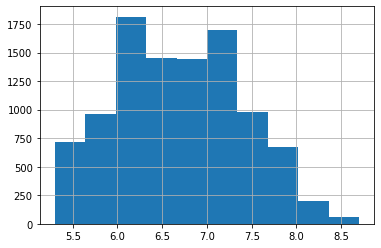

In [ ]:
dfcopia['Nota do Público'].hist()